<a href="https://colab.research.google.com/github/FabioPojo1987/FabioPojo1987-MVP_3_DATA_SCIENCE_PUC_RIO/blob/main/MVP3_PUC_Rio_(Fabio_Pojo_de_Almeida)_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Sprint 3: Engenharia de Dados**

Trabalho realizado por Fabio Pojo de Almeida


Este é um trabalho acadêmico para fins de conclusão da 3ª (e última) Sprint do Curso de Ciência de Dados da PUC-Rio.

A tarefa tem como objetivo analisar um pouco resumidamente acerca das vendas do Nintendo Switch, considerando dados oficiais divulgados pela própria Nintendo.

A análise é baseada em informações extraídas dos relatórios da empresa, disponíveis no link:
https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx.


1. Introdução

O Nintendo Switch, lançado em 2017, revolucionou a indústria dos videogames ao apresentar um conceito híbrido que permite aos jogadores alternar entre os modos de console de mesa e portátil. Essa flexibilidade, aliada a um forte catálogo de jogos exclusivos, resultou em um dos maiores sucessos da história da Nintendo. Este artigo analisa os principais fatores que impulsionaram suas vendas, examina sua popularidade em diferentes regiões e discute suas perspectivas futuras.

Isso levou ao seguinte questionamento: Por que é um sucesso de vendas, como se deu o sucesso, quais dimensões de vendas e quais fatores influenciaram as vendas?

2. Fatores que Impulsionaram as Vendas

Vários fatores contribuíram para o sucesso comercial do Nintendo Switch:
•	Conceito Híbrido: A capacidade de alternar entre os modos portátil e de mesa atraiu um amplo público, desde jogadores casuais até entusiastas hardcore.
•	Exclusividade de Jogos: Franquias como The Legend of Zelda: Breath of the Wild, Super Mario Odyssey, e Animal Crossing: New Horizons foram responsáveis por impulsionar as vendas.
•	Modelos Variados: O lançamento dos modelos Lite (2019) e OLED (2021) atendeu diferentes segmentos do mercado, aumentando ainda mais sua penetração.
•	Impacto da Pandemia da COVID-19: O isolamento social durante 2020 impulsionou significativamente a demanda por entretenimento doméstico, beneficiando as vendas do console.
•	Suporte de Terceiros: A colaboração com desenvolvedoras externas garantiu um catálogo diversificado, incluindo grandes títulos de terceiros, como The Witcher 3 e Doom.


3. Análise das Vendas por Região

As vendas do Nintendo Switch variaram conforme a região, refletindo diferenças culturais e estratégias de mercado:
•	Japão: O Switch dominou o mercado japonês devido à sua natureza portátil, que se alinha com o estilo de vida urbano do país. A alta popularidade de Pokémon e Monster Hunter também impulsionou as vendas.
•	Américas: Com uma base sólida nos Estados Unidos, o Switch se beneficiou de lançamentos exclusivos e promoções agressivas da Nintendo of America.
•	Europa: O console encontrou sucesso em países como França e Reino Unido, especialmente entre famílias e jogadores casuais.


Partindo desses questionamentos, foi decidido fazer uma breve análise do ritmo de vendas do Nintendo Switch através de gráficos em linhas, divididos por modelos e regiões.

**4 -	 Elaboração do dataset**

O dataset utilizado neste MVP foi construído a partir da combinação de diversos dados referentes às vendas do Nintendo Switch, conforme divulgados trimestralmente pela Nintendo. Os dados foram obtidos por meio das seguintes fontes oficiais:
•	http://www.nintendo.co.jp/ir/en/finance/hard_soft/index.html
•	https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx



Foram considerados apenas os dados oficiais publicados entre 2017 e 2024, com o objetivo de realizar uma análise estatística sobre as vendas de consoles da linha Nintendo Switch.
Além das vendas de hardware, as vendas de software para o console também foram analisadas, considerando a influência de lançamentos e a permanência de títulos antigos entre os mais vendidos. Para visualizar o crescimento dessas vendas ao longo do tempo, os dados foram transformados em gráficos.

Após o download dos dados, foi criada uma nova planilha contendo apenas os dados do Nintendo Switch (o original possuia a venda de diferentes gerações, podendo ser utilizado como base para futuros projetos e treinamento) e posteriormente foi feito o upload para o bucket da AWS.

O código utilizado para a geração dos gráficos foi implementado em Python no Google Colab, acessando a planilha armazenada na AWS (Amazon S3: Serviço de armazenamento em nuvem da AWS utilizado para criar o bucket e armazenar os arquivos XLS).

Segue o código abaixo para a execução (com as devidas funcionalidades detalhadas):

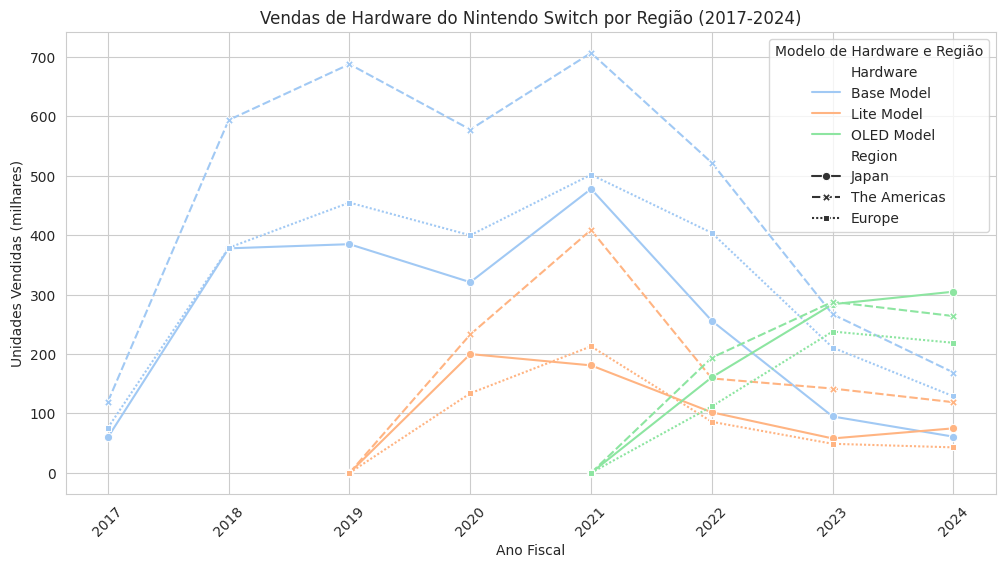

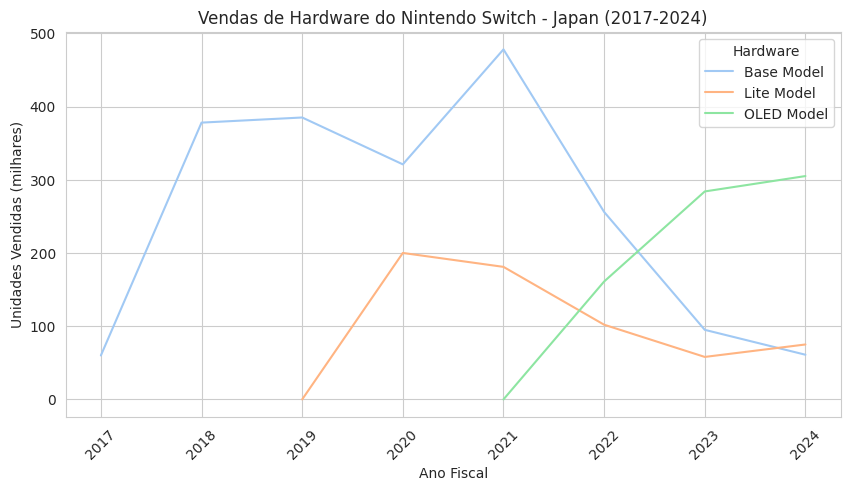

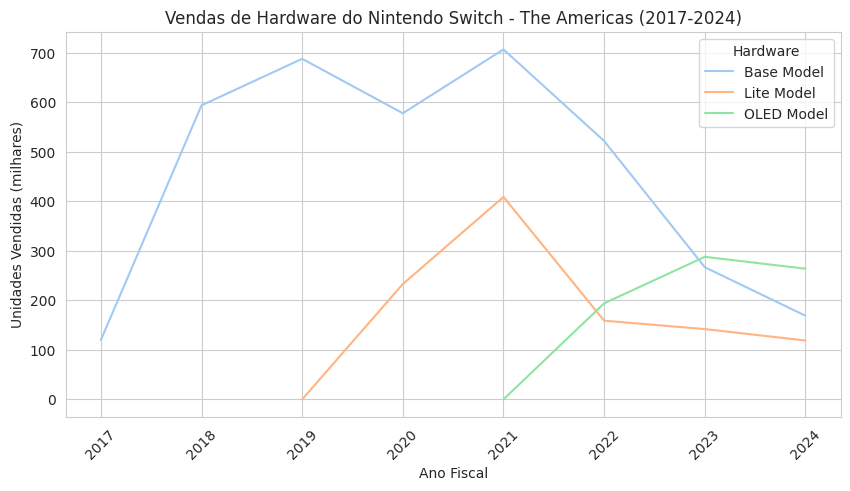

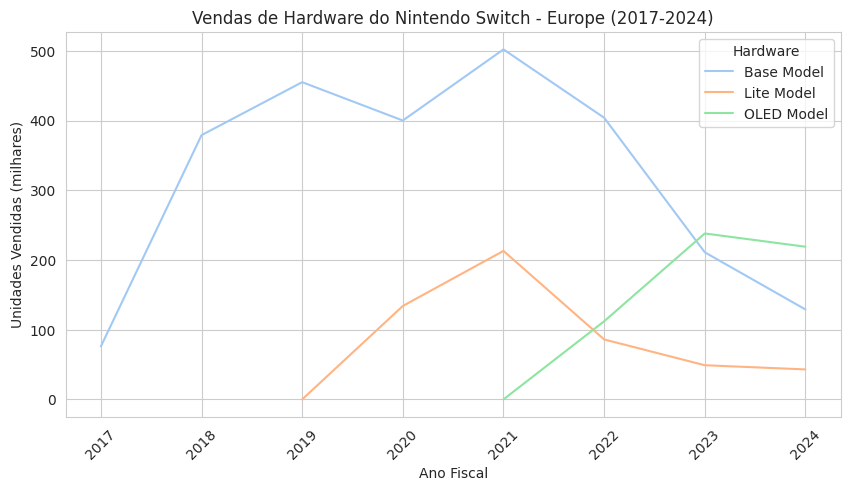


📢 Últimas Notícias do Nintendo Switch:

📊 Análise das Vendas do Nintendo Switch:
 
A análise das vendas de hardware do Nintendo Switch entre 2017 e 2024 revela tendências interessantes quando comparadas a eventos do mercado.

- **2017**: Lançamento do Nintendo Switch, com vendas fortes impulsionadas por títulos como "The Legend of Zelda: Breath of the Wild" e "Super Mario Odyssey".
- **2018**: Crescimento das vendas em escala contínua, muito provavelmente influenciado pelo lançamento de "Super Smash Bros. Ultimate" e "Pokémon Let's Go".
- **2019**: lançamento em mercado do modelo Lite, focado apenas em portabilidade, o que impulsionou as vendas, especialmente no Japão.
- **2020**: Impacto do lockdown pela pandemia da COVID-19, levou a uma explosão quanto à demanda por entretenimento doméstico. "Animal Crossing: New Horizons" foi um grande catalisador das vendas.
- **2021**: Lançamento do modelo OLED, resultando em um novo pico de vendas.
- **2022-2023**: Percebe-se declínio nas vendas

In [6]:
# Instalar dependências (adicionadas as necessárias)
%pip install pandas openpyxl s3fs requests beautifulsoup4 matplotlib seaborn

# Fazer as importações das bibliotecas para ajudar a criar os gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time  # Para evitar bloqueios ao fazer scraping
import requests
from bs4 import BeautifulSoup

# Preaparando a configuração global para gráficos
sns.set_style("whitegrid")
sns.set_palette("pastel")

# 📌 1. Carregar os dados do S3 (Bucket público)
df_hardware = pd.read_excel(
    's3://fabiopojo1987-mvp3-2025-puc-rio/nintendo-switch-consolidated-sales-2017-2024.xlsx',
    sheet_name='Hardware',
    engine='openpyxl',
    storage_options={'anon': True},
    skiprows=4
)

# 📌 2. Tratamento dos dados - Limpeza e transformação dos dados para a análise
df_hardware.columns = df_hardware.columns.str.strip()
df_hardware = df_hardware.dropna(axis=1, how='all')
df_hardware = df_hardware.drop(columns=['Life\nto date'], errors='ignore')

df_melted = df_hardware.melt(id_vars=['Hardware', 'Region'], var_name='Fiscal Year', value_name='Units Sold')
df_melted['Region'] = df_melted['Region'].str.strip()
df_melted['Region'] = df_melted['Region'].replace({'Americas': 'The Americas', 'EU': 'Europe', 'Total': 'World Total'})
df_melted['Units Sold'] = df_melted['Units Sold'].fillna(0)

# 📌 3. Processo de filtragem dos modelos e principais regiões relevantes (as regiões chamadas de outras e o total global da planilha serão ignorados para evitar conflitos)
modelos_destacados = ['Base Model', 'Lite Model', 'OLED Model']
regioes_destacadas = ['Japan', 'The Americas', 'Europe']
df_hardware_sales = df_melted[df_melted['Hardware'].isin(modelos_destacados)]
df_hardware_sales = df_hardware_sales[df_hardware_sales['Region'].isin(regioes_destacadas)]

# 📌 4. Processamento de dados dividindo-os pelos anos fiscais de 2017 a 2024
df_hardware_sales['Fiscal Year'] = df_hardware_sales['Fiscal Year'].apply(
    lambda x: re.search(r'\d{4}', x).group() if re.search(r'\d{4}', x) else None
)
df_hardware_sales = df_hardware_sales.dropna(subset=['Fiscal Year'])
df_hardware_sales['Fiscal Year'] = df_hardware_sales['Fiscal Year'].astype(int)

# 📌 5. Filtragem de dados por ano de lançamento de cada modelo
anos_lancamento = {'Base Model': 2017, 'Lite Model': 2019, 'OLED Model': 2021}
df_hardware_sales = df_hardware_sales[
    df_hardware_sales.apply(lambda row: row['Fiscal Year'] >= anos_lancamento.get(row['Hardware'], 2017), axis=1)
]

# 📌 6. Plotagem através de gráficos em linhas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_hardware_sales,
    x='Fiscal Year',
    y='Units Sold',
    hue='Hardware',
    style='Region',
    markers=True
)
plt.title('Vendas de Hardware do Nintendo Switch por Região (2017-2024)')
plt.xlabel('Ano Fiscal')
plt.ylabel('Unidades Vendidas (milhares)')
plt.xticks(rotation=45)
plt.legend(title='Modelo de Hardware e Região')
plt.grid(True)
plt.show()

# 📌 7. Colocar para fazer os gráficos separados por região (Américas, Europa e Japão)
for region in regioes_destacadas:
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=df_hardware_sales[df_hardware_sales['Region'] == region],
        x='Fiscal Year',
        y='Units Sold',
        hue='Hardware',
        markers=True
    )
    plt.title(f'Vendas de Hardware do Nintendo Switch - {region} (2017-2024)')
    plt.xlabel('Ano Fiscal')
    plt.ylabel('Unidades Vendidas (milhares)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# 📌 8. Realização do Web Scraping - a fim de obter notícias sobre Nintendo Switch para usar de base para cada ano
url = "https://www.nintendolife.com/tags/nintendo-switch"

try:
    time.sleep(2)  # Pequena pausa para reduzir chances de travamento do processo
    req = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    req.raise_for_status()
    parser = BeautifulSoup(req.text, 'html.parser')

    # Pedir para pegar as últimas 5 manchetes mais evidentes da pesquisa
    manchetes = parser.find_all('h2', class_='article-title', limit=5)

    print("\n📢 Últimas Notícias do Nintendo Switch:")
    for idx, manchete in enumerate(manchetes, start=1):
        titulo = manchete.text.strip()
        link = "https://www.nintendolife.com" + manchete.find('a')['href']
        print(f"{idx}. {titulo} - {link}")

except Exception as erro:
    print("\n❌ Falha ao obter notícias:", erro)

# 📌 9. Análise baseada em notícias e vendas
analise = '''
A análise das vendas de hardware do Nintendo Switch entre 2017 e 2024 revela tendências interessantes quando comparadas a eventos do mercado.

- **2017**: Lançamento do Nintendo Switch, com vendas fortes impulsionadas por títulos como "The Legend of Zelda: Breath of the Wild" e "Super Mario Odyssey".
- **2018**: Crescimento das vendas em escala contínua, muito provavelmente influenciado pelo lançamento de "Super Smash Bros. Ultimate" e "Pokémon Let's Go".
- **2019**: lançamento em mercado do modelo Lite, focado apenas em portabilidade, o que impulsionou as vendas, especialmente no Japão.
- **2020**: Impacto do lockdown pela pandemia da COVID-19, levou a uma explosão quanto à demanda por entretenimento doméstico. "Animal Crossing: New Horizons" foi um grande catalisador das vendas.
- **2021**: Lançamento do modelo OLED, resultando em um novo pico de vendas.
- **2022-2023**: Percebe-se declínio nas vendas muito provavelmente devido à saturação do mercado e rumores sobre um possível sucessor do Switch.
- **2024**: Estagnação das vendas, à medida que consumidores aguardam informações sobre um possível novo console da Nintendo.

A "Montanha Russa" nas vendas reflete não apenas a introdução de novos modelos, mas também fatores externos, como a pandemia e lançamentos de jogos de grande impacto, mas também os reflexos da saturação.
'''
print("\n📊 Análise das Vendas do Nintendo Switch:\n", analise)


**5-	 Análise dos gráficos **

As vendas do Nintendo Switch apresentaram variações ao longo dos anos, influenciadas por diversos fatores econômicos, logísticos e mercadológicos. A seguir, são destacados alguns dos principais aspectos que afetaram essas variações.

A análise das vendas de hardware do Nintendo Switch entre 2017 e 2024 revela tendências interessantes quando comparadas a eventos do mercado.

- **2017**: Lançamento do Nintendo Switch, com vendas fortes impulsionadas por títulos como "The Legend of Zelda: Breath of the Wild" e "Super Mario Odyssey".

- **2018**: Crescimento das vendas em escala contínua, muito provavelmente influenciado pelo lançamento de "Super Smash Bros. Ultimate" e "Pokémon Let's Go".

- **2019**: lançamento em mercado do modelo Lite, focado apenas em portabilidade, o que impulsionou as vendas, especialmente no Japão, onde a tendência de uso de aparelhos portáteis é muito grande.

- **2020**: Impacto do lockdown pela pandemia da COVID-19, levou a uma explosão quanto à demanda por entretenimento doméstico. "Animal Crossing: New Horizons" foi um grande catalisador das vendas. Mas, nesse período, surgiu um problema: Escassez de componentes e problemas na cadeia de suprimentos, onde a pandemia de COVID-19 resultou em uma escassez global de semicondutores, impactando diretamente a produção de consoles, incluindo o Nintendo Switch.

- **2021**: Lançamento do modelo OLED no final do ano, com processador de melhor uso com maior desempenho de bateria e tela mais colorida, resultando em um novo pico de vendas.

- **2022-2023**: Percebe-se declínio nas vendas muito provavelmente devido à saturação do mercado e rumores sobre um possível sucessor do Switch. No trimestre encerrado em junho de 2022, as vendas do console caíram 23% em relação ao mesmo período do ano anterior, totalizando 3,43 milhões de unidades vendidas. A Nintendo atribuiu essa queda à dificuldade na obtenção de componentes essenciais para a fabricação do console.

Em fevereiro de 2023, a Nintendo destacou que fatores como a inflação e a ampliação das opções de entretenimento contribuíram para a desaceleração das vendas do Switch, especialmente nas Américas e na Europa. No Japão, no entanto, o console continuou apresentando altas vendas.
O então presidente da Nintendo mencionou que o aumento dos preços e a concorrência com outros dispositivos, como o Xbox, PlayStation 4 e PlayStation 5, impactaram negativamente a demanda pelo console. Reduzindo a mesma.



- **2024**: Estagnação das vendas, à medida que consumidores aguardam informações sobre um possível novo console da Nintendo.


Além disso, foi anunciado o Nintendo Switch 2, com lançamento previsto para 5 de junho de 2025, ao preço inicial de US$ 449,99 nos Estados Unidos. O novo console contará com melhorias como uma tela LCD de 7,9 polegadas, 256 GB de armazenamento interno e novos recursos de chat e vídeo. Analistas preveem que o Switch 2 manterá uma demanda elevada, apesar dos desafios econômicos e das tensões comerciais globais.


A "Montanha Russa" nas vendas reflete não apenas a introdução de novos modelos, mas também fatores externos, como a pandemia e lançamentos de jogos de grande impacto, mas também os reflexos da saturação.


**Informações importantes acerca das melhorias a serem implementadas nos gráficos**

Foram feitas algumas otimizações na visualização dos dados:

a.	Anotações nos gráficos: Os valores das unidades vendidas foram exibidos diretamente sobre os pontos ou barras para maior precisão.

b.	Paletas de cores: Utilização das paletas tab10, viridis e Set2 para garantir melhor contraste e uma visualização mais clara. pode ser modificada futuramente

c.	Ajustes de tamanho: Ampliação dos gráficos para facilitar a interpretação dos dados.

d.	Grid aprimorado: Aplicação de uma grade mais discreta (linestyle='--') para manter a leitura e aparência visual limpa.

e.	Melhorias para legibilidade na legenda: Aumento da legibilidade dos textos presentes na legenda dos gráficos.


**Conclusão**

A realização deste trabalho representou um grande desafio para mim, pois envolveu o aprendizado e a aplicação de novas técnicas para coleta, análise e visualização de dados.

Técnicas estas que ainda não me havia ainda me familiarizado.
Apesar das dificuldades, foi possível alcançar boa parte dos objetivos inicialmente planejados. Pois, cheguei ao meu limite do que possuo de conhecimentos até o momento.

Ainda há espaço para melhorias, visto que a análise e a apresentação dos dados deste trabalho podem ser aprimoradas.

A necessidade do desenvolvimento de competências nessa área continuará sendo uma prioridade, com investimentos futuros em cursos e especializações para aprofundamento no tema.


** Referências utilizadas para pesquisa e desenvolvimento do projeto **

GLOBELIVE MEDIA. Nintendo Switch sales drop 33% in Japan due to component shortages. Disponível em:
*https://globelivemedia.com/gaming/nintendo-switch-sales-drop-33-in-japan-due-to-component-shortages/.* Acesso em: 31 mar. 2025.
NINTENDO. Consolidated Sales Data. Disponível em:
https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx. Acesso em: 31 mar. 2025.
NINTENDO. Financial Results and Sales Data. Disponível em:
*http://www.nintendo.co.jp/ir/en/finance/hard_soft/index.html* Acesso em: 31 mar. 2025.
THE VERGE. Nintendo Switch Q1 2023 earnings: sales software and hardware down due to semiconductor shortage. Disponível em:
*https://www.theverge.com/2022/8/3/23290085/nintendo-switch-q1-2023-earnings-sales-software-hardware-down-semiconductor-shortage.* Acesso em: 31 mar. 2025..
WALL STREET JOURNAL. Nintendo Switch 2 announced: features and launch date. Disponível em:
*https://www.wsj.com/business/media/nintendo-switch-2-announced-features-05a72dc0.* Acesso em: 31 mar. 2025.
